<a href="https://colab.research.google.com/github/alihammadbaig/ML/blob/master/Feature_Selection/Recursive_Feature_Elimination_CV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Recursive feature elimination (RFE) is a feature selection method that fits a model and removes the weakest feature (or features) until the specified number of features is reached. Features are ranked by the model’s coef_ or feature_importances_ attributes, and by recursively eliminating a small number of features per loop, RFE attempts to eliminate dependencies and collinearity that may exist in the model.

RFE requires a specified number of features to keep, however it is often not known in advance how many features are valid. To find the optimal number of features cross-validation is used with RFE to score different feature subsets and select the best scoring collection of features. The RFECV visualizer plots the number of features in the model along with their cross-validated test score and variability and visualizes the selected number of features.

To show how this works in practice, we’ll start with a contrived example using a dataset that has only 3 informative features out of 25.

**Reference:** https://www.scikit-yb.org/en/latest/api/features/rfecv.html

In [0]:
from sklearn.svm import SVC
from sklearn.datasets import make_classification

from yellowbrick.features import RFECV

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [0]:
# Create a dataset with only 3 informative features
X, y = make_classification(
    n_samples=1000, n_features=25, n_informative=3, n_redundant=2,
    n_repeated=0, n_classes=8, n_clusters_per_class=1, random_state=0
)

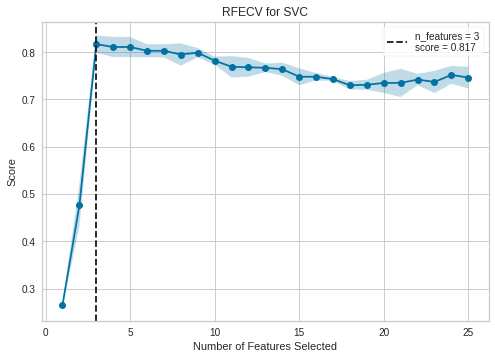

In [4]:
# Create RFECV visualizer with linear SVM classifier
viz = RFECV(SVC(kernel='linear', C=1))
viz.fit(X, y)
viz.poof()

**This figure shows an ideal RFECV curve, the curve jumps to an excellent accuracy when the three informative features are captured, then gradually decreases in accuracy as the non informative features are added into the model.**

**The shaded area represents the variability of cross-validation, one standard deviation above and below the mean accuracy score drawn by the curve.**

## Exploring a real dataset, we can see the impact of RFECV on a credit default binary classifier.

In [0]:
from sklearn.datasets import load_iris
import pandas as pd

x = load_iris()

df = pd.DataFrame(x.data, columns = x.feature_names)
df['target'] = x.target

X = df.drop("target",1)   #Feature Matrix
y = df["target"]          #Target Variable

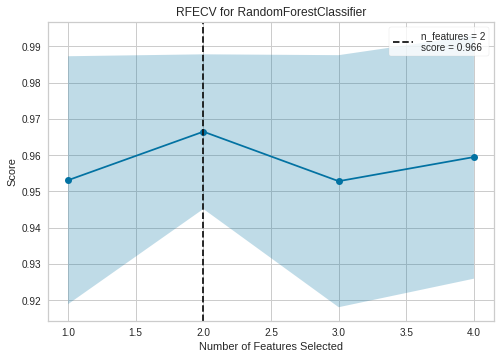

In [21]:
cv = StratifiedKFold(5)
oz = RFECV(RandomForestClassifier(), cv=cv, scoring='f1_weighted')

oz.fit(X, y)
oz.poof()